In [5]:
# import packages and data

import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from time import time
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

val_features = pd.read_csv('./x_val_features.csv')
val_labels = pd.read_csv('./y_val_labels.csv')
test_features = pd.read_csv('./x_test_features.csv')
test_labels = pd.read_csv('./y_test_labels.csv')

In [6]:
# import models

models = {}
for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GBM']:
    models[mdl] = joblib.load(f'./{mdl}_model.pkl')

In [14]:
# define functions

def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy=round(accuracy_score(labels, pred), 3)
    precision=round(precision_score(labels, pred), 3)
    recall=round(recall_score(labels, pred), 3)
    print(f'Model: {name} -- Accuracy: {accuracy} | Precision: {precision} | Recall: {recall} | Latency {round((end-start)*1000,1)}ms')
    plot_conf_mat(model, features, labels)
    
    
def plot_conf_mat(model, features, labels):
    pred = model.predict(features)
    cm = confusion_matrix(labels, pred, labels=model.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-inhibitor', 'inhibitor'])
    
    disp.plot()
    plt.show()

Model: LR -- Accuracy: 0.713 | Precision: 0.686 | Recall: 0.691 | Latency 2.4ms


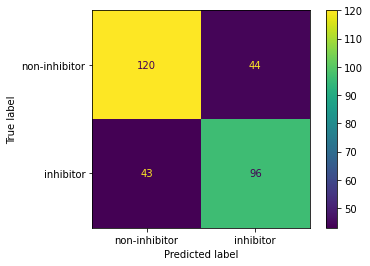

Model: SVM -- Accuracy: 0.749 | Precision: 0.698 | Recall: 0.799 | Latency 6.0ms


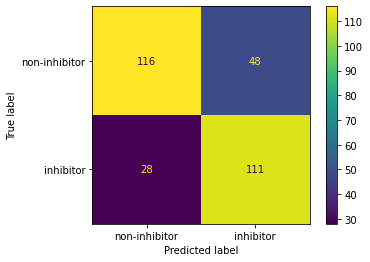

Model: MLP -- Accuracy: 0.696 | Precision: 0.636 | Recall: 0.791 | Latency 1.2ms


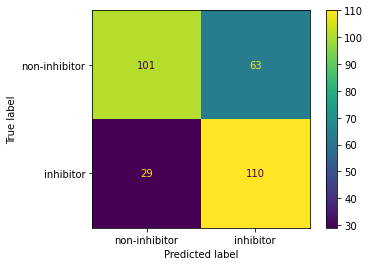

Model: RF -- Accuracy: 0.785 | Precision: 0.757 | Recall: 0.784 | Latency 19.6ms


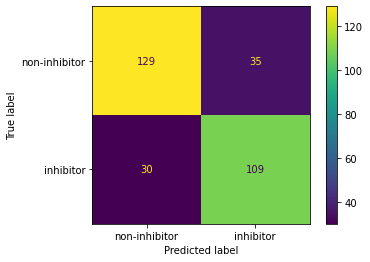

Model: GBM -- Accuracy: 0.749 | Precision: 0.711 | Recall: 0.763 | Latency 1.4ms


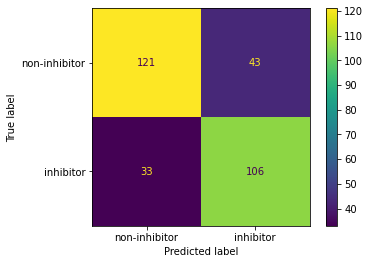

In [15]:
# validate models

for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

In [16]:
# Check feature importance

data = list(zip(models['RF'].feature_names_in_, models['RF'].feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
5,Maximal electrotopological positive variation ...,0.137560
12,topo_combined,0.118337
10,Mean Square Distance Balaban (MSDB),0.093892
11,zagreb_combined,0.088496
13,connectivity_combined,0.071929
9,E-state topological parameter (ETP),0.066295
0,Estate,0.062776
1,Polarity (Pol),0.061514
8,reciprocal distance square Randic-type index (...,0.058802
6,Reciprocal hyper-distance-path index (RHDPI),0.056774
